In [1]:
from collections import OrderedDict
import pandas as pd
import nltk
import jieba
#from nltk.util import ngrams
#from collections import defaultdict, Counter
#import random
from re import sub
from string import ascii_letters, digits, punctuation
import openai
from openai import OpenAI
#import spacy
from sklearn import svm, datasets
from gensim.models import FastText, Word2Vec
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from functions import *

In [2]:
def clear_en(txt):
    en = list(ascii_letters) + list(digits) + list(punctuation)
    return ''.join([i if i not in en else 'o' for i in txt])

def clear_chpunc(txt):
    to_del = '（「」『』《》【】'
    to_repl = '）——《》：'
    txt = ''.join([i if i not in to_del else '' for i in txt])
    return ''.join([i if i not in to_repl else '。' for i in txt])

def modify(api_key, sentences):
    client = OpenAI(api_key=api_key)
    modified = []
    for i, sentence in enumerate(sentences):
        response = client.chat.completions.create(
        messages=[
            {
            'role': 'user',
            'content': '''請發揮創意根據這句話進行改寫、濃縮、或擴增, 使其更為通順合理,
                          且句子字數介於 20 至 26 之間 (請使用繁體中文): '''
                          + sentence,
            }
                 ],
            model='gpt-3.5-turbo',
        )

        modified.append(response.choices[0].message.content)
    return modified

In [3]:
f = open('C:\\Users\\jowan\\Downloads\\data\\text-data.txt', 'r', encoding='utf-8')
s = f.read()
f.close()

s = s.translate({ord('\n'): None, ord('\x0c'): None, ord('※'): None, ord('…'): '。'})
s = sub(r'。+', '。', sub(r'！', '。', sub('？', '。', s)))
s = sub(r'o+', 'o', clear_chpunc(clear_en(s)))
s = s.split('。')

txt = ['-'.join(jieba.cut(i)) for i in s]
txt = [i.split('-') for i in txt]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\jowan\AppData\Local\Temp\jieba.cache
Loading model cost 1.142 seconds.
Prefix dict has been built successfully.


In [4]:
%%time

model = ngram(4, txt)
res = []
for i in range(30):
    while 1:
        generated = model.generate()
        if 10 <= len(generated) <= 26 :
            res.append(generated + '。')
            break

key = 'my_key'
modified = modify(key, modify(key, modify(key, res)))

df = pd.DataFrame({'4-gram gen':res, 'ChatGPT-mod':modified})
df

CPU times: total: 1min 5s
Wall time: 2min 50s


,4-gram gen,ChatGPT-mod
0,我心想這個男的倒是滿鎮定的。,我的觀察是，這位紳士看起來非常鎮定冷靜，毫不慌亂。
1,這場對話似乎沒有任何進展了，於是瑠衣問道。,尷尬的氛圍開始籠罩著他們的對話，瑠衣最終打破了這場靜默。
2,我真的有急事無法脫身。,因為有突發事件需要處理，所以我無法臨時離開。
3,我要你陪我到旅行回來為止。,希望你能陪伴我走完這段旅程，直到我歸來的那一天。
4,每天晚上我打開窗戶望著星星，心裡想著。,夜夜靜坐，凝望星空，心中湧現無盡幻想。
5,但是為什麼她不打算懷社長的孩子呢。,為何她不肯懷孕生下社長的孩子呢？
6,看你房間的燈熄了，我在通往自家大廈的三岔路口下了車。,當我在通往我大樓的三岔路口看到你家的燈熄了，心中不由得停下車，陷入沉思。
7,因為過於投入，一旦失去反而無路可去。,一旦投入過多資源，就難以停下來。
8,就這樣我只好在那天傍晚聯絡百合小姐。,當天傍晚，我無奈地致電百合小姐，事情由此展開。
9,扇谷笑著說你山窮水盡到這種程度，好像三餐都靠著泡麵。,扇谷笑著警告你，你已深陷困境，就像每天只有泡麵可吃一般。


In [8]:
for i in s:
    if '你也認為我很隨便' in i: print(i)

就是因為我在那種地方打工，你也認為我很隨便，對不對


In [15]:
iris = datasets.load_iris()
x = iris.data[:, :2] 
y = iris.target
y = np.array([i if i != 2 else 1 for i in y]) 
y = np.array([i if i != 0 else -1 for i in y])
y[41] = 1

print(x.shape, y.shape)

(150, 2) (150,)


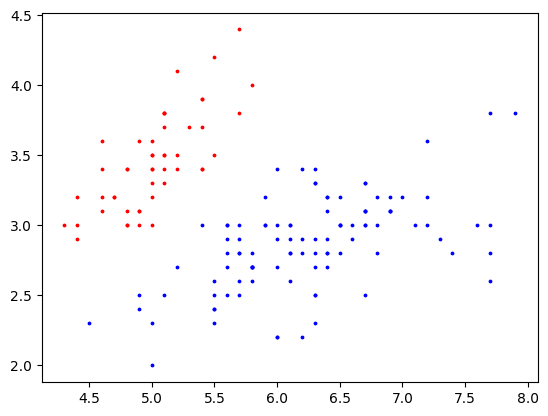

In [16]:
plt.scatter(x[:,0][y==-1], x[:,1][y==-1], s=3, c='r')
plt.scatter(x[:,0][y==1], x[:,1][y==1], s=3, c='b')
plt.show()

In [69]:
%%time

alpha, batch_size, w0, b0, c = 0.1, 30, np.array([0.5,5.0]), 20, 0.001
w, b = subGD(alpha, batch_size, x, y, w0, b0, c, n_epochs=3000)
print(w, b)

[ 11.15351953 -14.56590418] 15.50000000000004
CPU times: total: 1.73 s
Wall time: 2.27 s


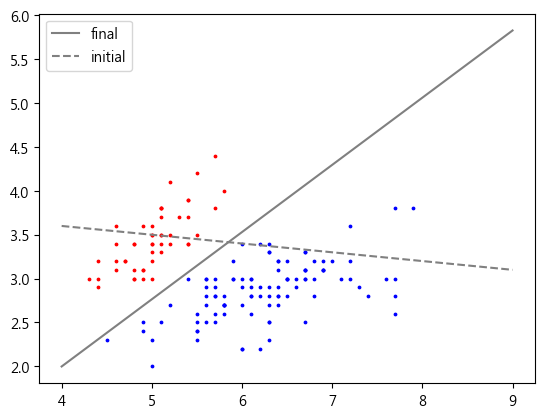

In [70]:
X = np.linspace(4,9,100)
Y_final = (-w[0]/w[1])*X - (-b/w[1])
Y_init = (-0.5/5.0)*X - (-20/5.0)
#Y_scikit = (-w_[0][0]/w_[0][1])*X - (-b_/w_[0][1])
plt.plot(X, Y_final, c='grey')
plt.plot(X, Y_init, c='grey', linestyle='--')
#plt.plot(X, Y_scikit, c='black')
plt.scatter(x[:,0][y==-1], x[:,1][y==-1], s=3, c='r')
plt.scatter(x[:,0][y==1], x[:,1][y==1], s=3, c='b')
plt.legend(['final','initial'])
plt.show()

In [61]:
from sklearn.svm import SVC
clf = SVC(gamma='auto', kernel='linear')
clf.fit(x, y)

SVC(gamma='auto', kernel='linear')

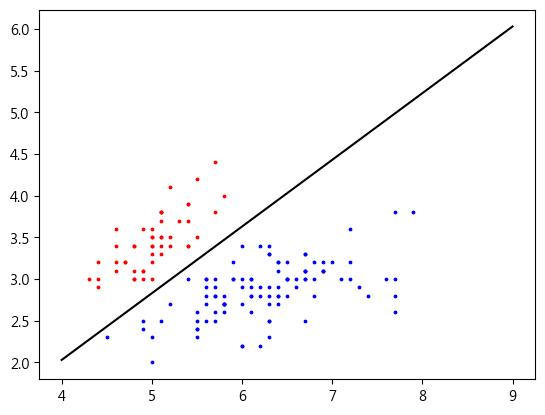

In [72]:
w_ = clf.coef_[0]
b_ = clf.intercept_[0]

X = np.linspace(4,9,100)
Y_scikit = (-w_[0]/w_[1])*X - (b_/w_[1])
plt.plot(X, Y_scikit, c='black')
plt.scatter(x[:,0][y==-1], x[:,1][y==-1], s=3, c='r')
plt.scatter(x[:,0][y==1], x[:,1][y==1], s=3, c='b')
plt.show()

In [50]:
from sklearn import metrics
y_predict = clf.predict(x)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y, y_predict))

Accuracy: 1.0


In [19]:
N = len(y)
y_pred = np.empty(N)
for i in range(N):
    if matmul(w.transpose(), x[i]) - b >= 1:
        y_pred[i] = 1
    else:
        y_pred[i] = -1
check = (y_pred == y)

t = 0
for i in check:
    if i == True:
        t += 1

print('percentage of the training words that lie on the correct side', t/len(check))

percentage of the training words that lie on the correct side 1.0


In [6]:
df = pd.read_excel('results_W_VAL_AROUS.xlsx')
sentiment, group = [-100]*len(df), [-100]*len(df)
for i in range(len(df)):
    if df.at[i, 'val'] >= 2: 
        sentiment[i] = 1
        group[i] = 1
    elif df.at[i, 'val'] <= -2:
        sentiment[i] = 1
        group[i] = -1
    elif df.at[i, 'abs_val'] <= 0.25:
        sentiment[i] = -1
        group[i] = 0

df.insert(4, 'sentiment', sentiment)
df.insert(5, 'group', group)
df = df[df['sentiment'] != -100].reset_index(drop=True)
df

,words,mean,val,abs_val,sentiment,group
0,結局,5.230769,0.230769,0.230769,-1,0
1,制度,4.923077,-0.076923,0.076923,-1,0
2,失落,2.538462,-2.461538,2.461538,1,-1
3,無業,2.923077,-2.076923,2.076923,1,-1
4,直性子,4.769231,-0.230769,0.230769,-1,0
...,...,...,...,...,...,...
496,救濟,5.076923,0.076923,0.076923,-1,0
497,威脅,2.384615,-2.615385,2.615385,1,-1
498,糟糕,2.076923,-2.923077,2.923077,1,-1
499,條件,4.846154,-0.153846,0.153846,-1,0


In [109]:
# deal with repeated words in the original results_W_VAL_AROUS.xlsx
# use Word2Vec for word bector embedding instead of FastText
# Use K-means (unsupervised ML) to group the words in each sentence modified by ChatGPT
    # to see if this relates to the setences' valence values (rated by me)
# KNN (supervised ML)

In [7]:
V, words = set(df['words']), list(df['words'])
w_group, w_sentiment = OrderedDict(), OrderedDict()
for w in V:
    w_group[w], w_sentiment[w] = df.at[words.index(w), 'group'], df.at[words.index(w), 'sentiment']
    
display(w_group)
display(w_sentiment)

OrderedDict([('蹲低', 0),
             ('罰錢', -1),
             ('勞動', 0),
             ('才華', 1),
             ('自殺', -1),
             ('療癒', 1),
             ('自焚', -1),
             ('沒買', 0),
             ('不安', -1),
             ('妹妹', 0),
             ('家人', 0),
             ('爽朗', 1),
             ('辦法', 0),
             ('執勤', 0),
             ('想法', 0),
             ('房屋', 0),
             ('真愛', 1),
             ('事故', -1),
             ('放火', -1),
             ('拿下', 0),
             ('直性子', 0),
             ('公關', 0),
             ('消沈', -1),
             ('高利貸', -1),
             ('崩壞', -1),
             ('洗禮', 0),
             ('邪惡', -1),
             ('經歷', 0),
             ('醒著', 0),
             ('適應期', 0),
             ('外務', 0),
             ('暴行', -1),
             ('不爽', -1),
             ('噁心', -1),
             ('條件', 0),
             ('留門', 0),
             ('自在', 1),
             ('破產', -1),
             ('趴下', 0),
             ('如願以償', 1),
             ('耳飾', 0

OrderedDict([('蹲低', -1),
             ('罰錢', 1),
             ('勞動', -1),
             ('才華', 1),
             ('自殺', 1),
             ('療癒', 1),
             ('自焚', 1),
             ('沒買', -1),
             ('不安', 1),
             ('妹妹', -1),
             ('家人', -1),
             ('爽朗', 1),
             ('辦法', -1),
             ('執勤', -1),
             ('想法', -1),
             ('房屋', -1),
             ('真愛', 1),
             ('事故', 1),
             ('放火', 1),
             ('拿下', -1),
             ('直性子', -1),
             ('公關', -1),
             ('消沈', 1),
             ('高利貸', 1),
             ('崩壞', 1),
             ('洗禮', -1),
             ('邪惡', 1),
             ('經歷', -1),
             ('醒著', -1),
             ('適應期', -1),
             ('外務', -1),
             ('暴行', 1),
             ('不爽', 1),
             ('噁心', 1),
             ('條件', -1),
             ('留門', -1),
             ('自在', 1),
             ('破產', 1),
             ('趴下', -1),
             ('如願以償', 1),
             ('

In [9]:
key = 'my_key' 
client = OpenAI(api_key=key)
new_sentences = []
for i, w in enumerate(df['words']):
    response = client.chat.completions.create(
    messages=[
            {
            'role': 'user',
            'content': '''請使用以下詞彙造句,
                          使句子字數介於 20 至 26 之間 (請使用繁體中文): '''
                          + w,
            }
                 ],
        model='gpt-3.5-turbo',
        )

    new_sentences.append(response.choices[0].message.content)
new_sentences

['這部電影的結局令人感到意猶未盡，讓觀眾都留下深刻的印象。',
 '這個國家的教育制度非常嚴謹，學生必須依照規定的考試方式進行。',
 '他走進房間，看著窗外的雨滴，感覺內心一片失落，不知要如何面對。',
 '他不斷辭退工作，讓家人感到擔憂，他成了一位無業閒人。',
 '他是個直性子的人，說話從不拐彎抹角，總是直接點明問題的核心。',
 '討論這個社會議題，需要更多人關注並積極參與其中。',
 '經過上個月的營業報告，我們將重新調整業務策略以提升營收。',
 '他只完成了部分作業，所以老師批評他沒有盡全力。',
 '他對未來的計畫感到很渺茫，但仍努力不放棄努力追求自己的夢想。',
 '我們今天的會議結束得很順利，大家都心情愉快地離開了會議室。',
 '他是個喜歡惹事的混混，經常在校園裡惹是生非，讓老師頭疼不已。',
 '他被警方抓獲後，面臨著販毒罪的指控，可能將面臨嚴重的刑罰。',
 '這個藥物對我來說不適用，我需要找其他治療方案。',
 '經過這麼多年的朝夕相處，我們之間建立起了一份溫馨而深厚的友誼。',
 '這份文件需要符合公司的標準規定，才能夠通過審核。',
 '她感到累了，停下來深深地呼吸，讓自己恢復精神和力量。',
 '老師用簡單的方式說明了複雜的問題，讓我們都豁然開朗。',
 '他的卑鄙行徑讓人感到厭惡，完全背棄了道德準則。',
 '他感到孤單與哀傷，\n因為被親人遺棄在這荒涼的地方。',
 '他獨自一人在夜晚的街頭徘徊，深感內心的落寞與孤獨。',
 '他的言語攻擊讓我感到非常受傷，我希望他能夠停止這種行為並尊重我的感受。',
 '工人們在工廠裡起早燒午夜油，為了家人努力工作。',
 '公司為了宣傳新產品，決定舉辦一場大型的活動。',
 '我們之間建立了深厚的信任，這讓我感到非常安心和放心。',
 '這個城市的人們總是忙碌著走來走去，彷彿永遠都沒有停止的一天。',
 '孩子們收到禮物時，雀躍地跳躍起來，臉上露出開心的笑容。',
 '她的容貌端莊優雅，讓人讚嘆不已。',
 '他的朋友們不停地勸阻他，但他仍然堅持要去參加這場危險的比賽。',
 '我們本週末計畫外出到海邊散步，享受清新的空氣和美麗的風景。',
 '他今天早上就倒楣地撞到把傘，一整天運氣都不是很好。',
 '他因為工作壓力過大而感到沮喪，需要找人好好談談心情。',
 '這場紛爭已持續了數個月，

In [10]:
output = pd.DataFrame({'sentences': new_sentences})
output.to_excel('sentences-by-chatgpt.xlsx', index=False)

In [11]:
raw = pd.read_excel('sentences-by-chatgpt.xlsx')
s = list(raw['sentences'])

texts = ['-'.join(jieba.cut(i)) for i in s]
texts = [i.split('-') for i in texts]

for i in texts:
    while '，' in i:
        i.remove('，')
texts

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\jowan\AppData\Local\Temp\jieba.cache
Loading model cost 0.525 seconds.
Prefix dict has been built successfully.


[['這部',
  '電影',
  '的',
  '結局',
  '令人',
  '感到',
  '意猶未',
  '盡',
  '讓',
  '觀眾',
  '都',
  '留下',
  '深刻',
  '的',
  '印象',
  '。'],
 ['這個',
  '國家',
  '的',
  '教育',
  '制度',
  '非常',
  '嚴謹',
  '學生',
  '必須',
  '依照',
  '規定',
  '的',
  '考試',
  '方式',
  '進行',
  '。'],
 ['他',
  '走',
  '進房間',
  '看著',
  '窗外',
  '的',
  '雨滴',
  '感覺',
  '內心',
  '一片',
  '失落',
  '不知',
  '要',
  '如何',
  '面對',
  '。'],
 ['他',
  '不斷',
  '辭退',
  '工作',
  '讓',
  '家人',
  '感到',
  '擔憂',
  '他成',
  '了',
  '一位',
  '無業',
  '閒人',
  '。'],
 ['他',
  '是',
  '個',
  '直性子',
  '的',
  '人',
  '說話',
  '從',
  '不',
  '拐',
  '彎',
  '抹',
  '角',
  '總是',
  '直接',
  '點明',
  '問題',
  '的',
  '核心',
  '。'],
 ['討論', '這個', '社會', '議題', '需要', '更多人', '關注', '並積', '極參', '與', '其中', '。'],
 ['經過',
  '上個',
  '月',
  '的',
  '營業',
  '報告',
  '我們將',
  '重新',
  '調整',
  '業務',
  '策略',
  '以',
  '提升',
  '營收',
  '。'],
 ['他',
  '只',
  '完成',
  '了',
  '部分',
  '作業',
  '所以',
  '老師',
  '批評',
  '他',
  '沒',
  '有',
  '盡',
  '全力',
  '。'],
 ['他',
  '對',
  '未來',
  '的',
  '計畫',
  '感到',
  '很',
  '渺茫',
  

In [12]:
#ft_model = FastText(vector_size = 2,
                    #window = 5,
                    #min_count = 3,
                    #workers = 4,
                    #batch_words = 10000)
#ft_model.build_vocab(corpus_iterable=texts)
#ft_model.train(corpus_iterable=texts, total_examples=len(texts), epochs=32)
w2v_model = Word2Vec(sentences=texts, vector_size=100, window=5, min_count=1, workers=4)
#w2v_model.train(texts, total_examples=1, epochs=1)

vector = w2v_model.wv['暴行']  # get numpy vector of a word
sims = w2v_model.wv.most_similar('暴行', topn=10)
print(sims)

[('這台', 0.3825390636920929), ('觀察', 0.3494584560394287), ('理解', 0.34869369864463806), ('達到', 0.34701016545295715), ('之外', 0.3398588001728058), ('好', 0.3276240825653076), ('感受', 0.32583093643188477), ('月', 0.31853458285331726), ('臭豆腐', 0.31749626994132996), ('經濟', 0.3088911175727844)]


In [13]:
vec = {}
for i in w_sentiment.keys():
    try:
        vec[i] = w2v_model.wv[i]
    except KeyError:
        vec[i] = np.array([10]*100)
vec_matrix = pd.DataFrame(data=vec).transpose()
vec_matrix.insert(100, 'sentiment', list(w_sentiment.values()))
vec_matrix.insert(101, 'group', list(w_group.values()))
vec_matrix

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,sentiment,group
蹲低,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,-1,0
罰錢,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1,-1
勞動,-0.007588,-0.002439,-0.000538,0.001206,-0.004413,0.003489,0.001870,-0.006516,0.008829,-0.002064,...,0.009987,0.005246,0.008779,-0.008533,-0.003637,-0.008003,-0.006589,-0.005441,-1,0
才華,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1,1
自殺,-0.009277,0.004447,0.001707,0.008527,-0.002890,0.009252,-0.005318,0.001247,-0.005766,-0.004131,...,-0.002515,-0.000766,0.000625,0.009440,0.002116,-0.007999,-0.009662,0.007835,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
呼吸,0.001980,-0.000667,0.002369,-0.006624,0.006142,-0.000372,-0.005070,0.004356,-0.000888,0.005087,...,0.008271,-0.009523,0.010187,0.005555,0.009174,0.001166,-0.005755,0.002928,-1,0
美,0.004232,0.000231,-0.006889,-0.003127,-0.008402,0.007913,0.004511,-0.001717,0.006195,0.002945,...,-0.000418,0.000655,0.002034,0.009936,-0.007952,0.007306,-0.006440,-0.002066,1,1
受傷,0.001805,-0.006986,-0.006198,0.007979,0.004599,0.006510,-0.003836,0.003549,-0.007753,0.005799,...,0.005317,0.007619,-0.006090,0.003564,-0.005844,-0.000650,0.007408,0.003380,1,-1
參與,-0.009286,0.010693,-0.006641,-0.007888,-0.008313,-0.006625,0.004063,0.014868,0.001451,0.006867,...,-0.000235,-0.004558,0.010815,-0.002796,-0.006223,-0.006238,0.008185,0.006482,-1,0


In [14]:
vec_matrix = vec_matrix.drop(vec_matrix[vec_matrix[0] == 10.00].index)
vec_matrix

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,sentiment,group
勞動,-0.007588,-0.002439,-0.000538,0.001206,-0.004413,0.003489,0.001870,-0.006516,0.008829,-0.002064,...,0.009987,0.005246,0.008779,-0.008533,-0.003637,-0.008003,-0.006589,-0.005441,-1,0
自殺,-0.009277,0.004447,0.001707,0.008527,-0.002890,0.009252,-0.005318,0.001247,-0.005766,-0.004131,...,-0.002515,-0.000766,0.000625,0.009440,0.002116,-0.007999,-0.009662,0.007835,1,-1
自焚,0.002661,-0.004719,0.007615,-0.001214,0.006767,-0.008340,-0.001884,0.004204,-0.009498,-0.010283,...,-0.004918,-0.009355,0.004697,-0.001305,-0.003543,-0.006505,0.001846,-0.009594,1,-1
不安,-0.000024,0.004025,0.006427,0.005921,0.002937,-0.015615,-0.006995,0.006821,-0.011921,0.005815,...,0.006774,-0.006080,0.003716,-0.003937,0.002176,-0.003508,-0.002363,0.001570,1,-1
妹妹,-0.009692,0.000742,0.000810,-0.001879,0.004420,-0.000489,0.007947,0.002900,0.003518,-0.002722,...,0.003178,0.004151,0.007403,-0.003506,0.009908,-0.000823,0.007162,-0.005287,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
呼吸,0.001980,-0.000667,0.002369,-0.006624,0.006142,-0.000372,-0.005070,0.004356,-0.000888,0.005087,...,0.008271,-0.009523,0.010187,0.005555,0.009174,0.001166,-0.005755,0.002928,-1,0
美,0.004232,0.000231,-0.006889,-0.003127,-0.008402,0.007913,0.004511,-0.001717,0.006195,0.002945,...,-0.000418,0.000655,0.002034,0.009936,-0.007952,0.007306,-0.006440,-0.002066,1,1
受傷,0.001805,-0.006986,-0.006198,0.007979,0.004599,0.006510,-0.003836,0.003549,-0.007753,0.005799,...,0.005317,0.007619,-0.006090,0.003564,-0.005844,-0.000650,0.007408,0.003380,1,-1
參與,-0.009286,0.010693,-0.006641,-0.007888,-0.008313,-0.006625,0.004063,0.014868,0.001451,0.006867,...,-0.000235,-0.004558,0.010815,-0.002796,-0.006223,-0.006238,0.008185,0.006482,-1,0


In [54]:
%%time
x_, y_ = vec_matrix.to_numpy(), vec_matrix['sentiment'].to_numpy()
alpha, batch_size, w0, b0, c = 0.1, 150, np.ones(x_.shape[1]), 1.0, 10**(-4)
w, b = subGD(alpha, batch_size, x_, y_, w0, b0, c, n_epochs=5000)
w

CPU times: total: 4.11 s
Wall time: 5.47 s


array([-1.89408855e+01,  3.60452834e+01,  2.48186351e+01, -2.48610286e+00,
       -1.21249041e+01, -1.84411825e+01,  3.12529643e+00,  3.16674435e+01,
       -1.89402158e+01, -5.02118101e+00, -2.80689143e+00, -4.48765907e+01,
       -5.58400223e+00,  2.08143656e+01, -4.80296512e+00, -3.54529673e+01,
        3.21547735e+01, -1.30636554e+01, -1.98476564e+01, -4.36850172e+01,
        9.66586662e+00,  2.32992100e+01,  1.73677606e+01, -1.16120783e+01,
       -1.12202857e+01,  4.43771971e-01, -9.39686982e+00, -1.84992831e+01,
       -8.15042682e+00,  1.29932794e+01,  9.74403565e+00,  6.32928009e+00,
       -1.08303442e+00, -1.40161371e+01, -2.07327097e+00,  4.04061807e+00,
        2.66479789e+01, -9.16710858e+00, -8.48940507e+00, -3.72702141e+01,
        9.52517919e+00, -2.78546336e+01, -2.47054080e+01,  3.57897051e+01,
        4.95077773e+00,  1.32831396e+01,  1.83906092e+01, -1.59896100e+01,
        2.18358914e+00,  2.71768296e+01,  1.81113233e+01,  2.66070059e+00,
       -2.60541971e+01,  

In [55]:
# LOL there must be a bug in my algorithm from scratch
N = len(y_)
y_pred = np.empty(N)
for i in range(N):
    if matmul(w.transpose(), x_[i]) - b >= 1:
        y_pred[i] = 1
    else:
        y_pred[i] = -1
check = (y_pred == y_)

t = 0
for i in check:
    if i == True:
        t += 1

print('percentage of the training words that lie on the correct side', t/len(check))

percentage of the training words that lie on the correct side 0.7982456140350878


In [73]:
clf = SVC(gamma='auto', kernel='linear')
clf.fit(x_, y_)

y_pred_scikit = clf.predict(x_)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_, y_pred_scikit))

Accuracy: 1.0


In [74]:
print(clf.coef_

array([[ 5.64794579e-04, -5.39142998e-04, -6.40111611e-04,
         8.67214986e-04, -8.82849665e-04,  5.74740080e-04,
        -6.72476786e-05,  2.74878825e-04,  6.92187746e-04,
         5.73053577e-04,  9.38442109e-05,  7.16403569e-04,
        -4.60849754e-05, -5.32261362e-04,  7.59183188e-04,
        -9.48655226e-04,  2.89235419e-04,  3.80428014e-04,
        -5.34428646e-04, -2.96627644e-04, -7.78973134e-04,
         4.85337372e-04,  4.55306247e-04, -1.66835688e-04,
        -3.81360187e-04, -3.28066292e-05, -1.18640883e-03,
         2.80088182e-04, -1.61267331e-04,  3.45103235e-04,
        -1.14914799e-03, -1.03492618e-04, -4.37621077e-04,
         4.00414928e-04, -3.61431179e-05, -9.50844244e-05,
         2.68989152e-04,  6.66147712e-05, -4.76567532e-04,
         6.10237726e-06, -1.39492755e-03, -7.69214128e-04,
        -1.62703210e-04, -2.62366545e-04,  1.64520655e-04,
        -1.12518333e-04,  2.07158330e-04,  1.00539341e-04,
         3.27046400e-04, -2.76035871e-04, -2.56493828e-0

In [ ]:
#decision tree?

In [22]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_res = tsne.fit_transform(x_)
tsne_res

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 342 samples in 0.000s...
[t-SNE] Computed neighbors for 342 samples in 0.189s...
[t-SNE] Computed conditional probabilities for sample 342 / 342
[t-SNE] Mean sigma: 0.020799
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.234642
[t-SNE] KL divergence after 300 iterations: 0.975554


array([[-4.2806544 , -2.9935641 ],
       [ 4.2553496 , -1.4600132 ],
       [ 6.299304  , -1.5313971 ],
       [ 6.840749  ,  1.0092134 ],
       [-4.700075  ,  1.0677081 ],
       [-3.5824337 ,  2.7693672 ],
       [ 4.9605722 ,  7.639917  ],
       [-3.8764293 , -1.1181173 ],
       [-3.2665002 , -2.0092845 ],
       [-5.0128202 , -1.7278363 ],
       [-5.149487  , -0.01264423],
       [ 3.9216523 , -1.2935147 ],
       [ 4.84656   , -0.7993393 ],
       [-3.6828587 , -0.61514014],
       [-3.3111591 , -0.8108248 ],
       [-4.0998383 , -0.07887281],
       [ 5.130486  ,  0.35503852],
       [ 4.398893  , -0.27679962],
       [-5.7719235 , -1.2622335 ],
       [-2.9394817 , -3.1042502 ],
       [-2.7389505 , -1.4603899 ],
       [-3.9890258 ,  0.35147575],
       [ 4.641965  ,  0.16593255],
       [ 4.0627456 ,  0.68744165],
       [-4.4431725 ,  1.0825638 ],
       [-5.75082   , -3.0936267 ],
       [ 4.4392557 ,  0.1297145 ],
       [-5.213628  , -0.7044436 ],
       [ 4.9606    ,

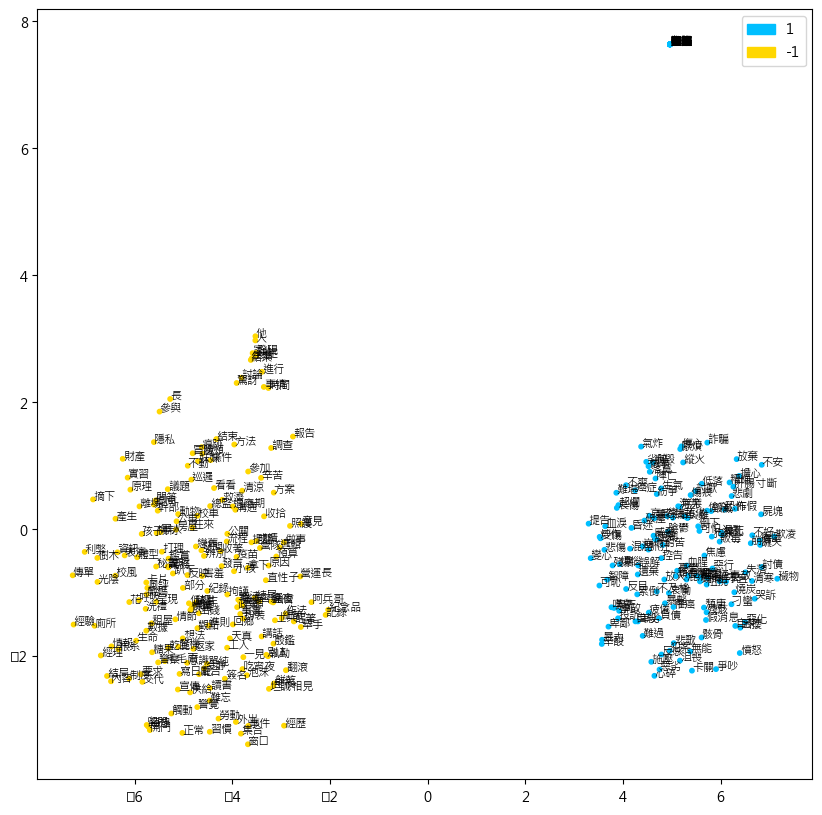

In [58]:
matplotlib.rc('font', family='Microsoft JhengHei')

labels = y_
colors_dict = {1:'deepskyblue', -1:'gold'}
colors = [colors_dict[i] for i in labels]

x_tsne, y_tsne = tsne_res[:,0], tsne_res[:,1]
fig, ax = plt.subplots(figsize=(10, 10))
scatter = ax.scatter(x_tsne, y_tsne, c=colors, s=10)

for i, txt in enumerate(vec_matrix.index):
    ax.annotate(txt, (x_tsne[i], y_tsne[i]), fontsize=8)


handles = [mpatches.Patch(color=list(colors_dict.values())[i], label=list(colors_dict.keys())[i])
           for i in range(len(colors_dict))]

ax.legend(handles=handles)
plt.show()

In [29]:
%%time

my_res = my_kmeans(X, 3)
my_res

CPU times: total: 906 ms
Wall time: 1.53 s


array([0, 1, 2, ..., 2, 0, 2])

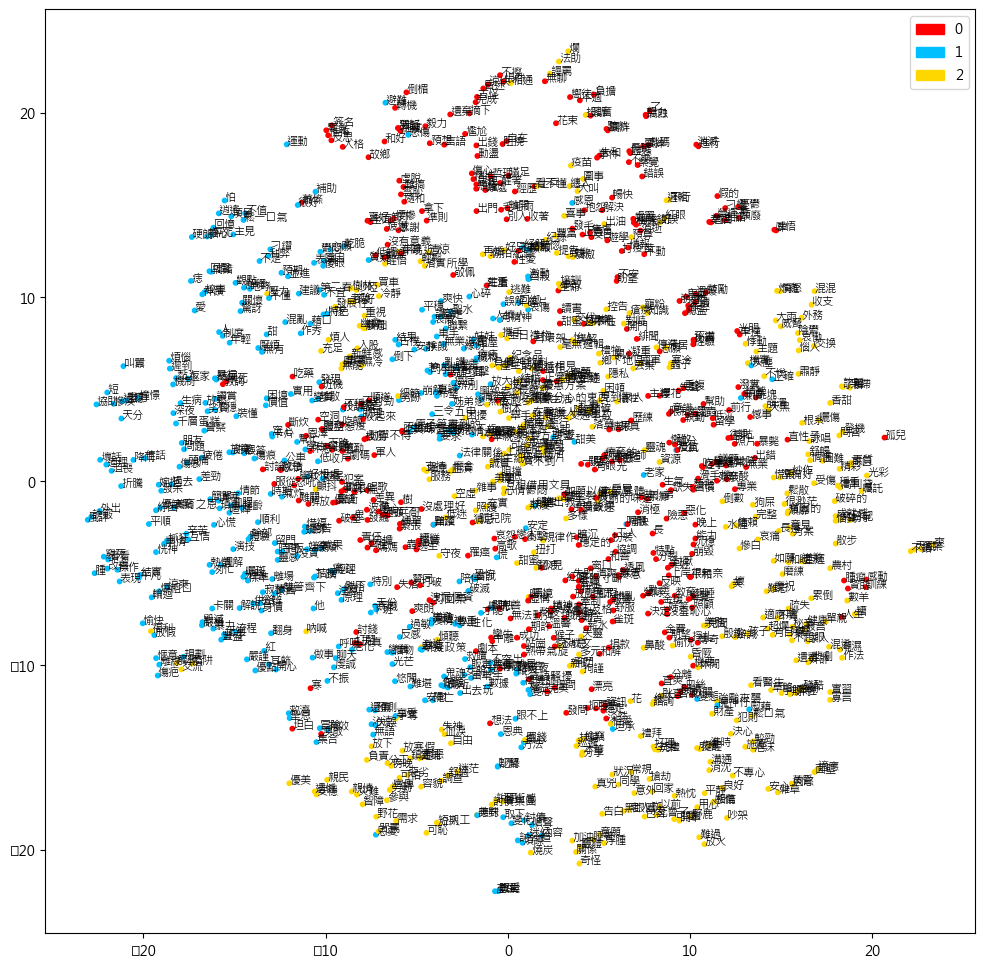

In [30]:
colors = [colors_dict[i] for i in my_res]
fig, ax = plt.subplots(figsize=(12, 12))
scatter = ax.scatter(x_, y_, c=colors, s=10)

for i, txt in enumerate(vec_matrix.index):
    ax.annotate(txt, (x_[i], y_[i]), fontsize=8)


handles = [mpatches.Patch(color=list(colors_dict.values())[i], label=list(colors_dict.keys())[i])
           for i in range(len(colors_dict))]

ax.legend(handles=handles)
plt.show()